<a href="https://colab.research.google.com/github/Hiruna-Kumara/Background_and_Ruled_Line_Noise_Removal_for_SL_NIC/blob/main/Code/Conditional%20Generative%20Adverserail%20Network/Final_Conditional_Generative_Adversarial_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import os
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

In [26]:
import tensorflow as tf
# %tensorflow_version 2.2.0
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.64.114.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.64.114.82:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


In [27]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [28]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [29]:
import os
import numpy as np
len(os.listdir('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed_fuzzy_filtered/'))

5500

In [30]:
def read_this(image_file, gray_scale=False):
    image_src = cv2.imread('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed_fuzzy_filtered/' + image_file) # read function for reading fuzzy filtered dataset
    image_src = cv2.resize(image_src, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [31]:
def binarize_lib(image_file, thresh_val=127, with_plot=False, gray_scale=False):
    image_src = read_this(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

In [32]:
from __future__ import absolute_import, division, print_function
import numpy as np


def add_gaussian_noise(img): # add Gaussian noise to images
    VARIABILITY = 50
    deviation  = VARIABILITY * random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [33]:
from __future__ import absolute_import, division, print_function
import numpy as np
import tensorflow as tf
import math


def normalize(data, new_range=(-1, 1), current_range=None, axis=None): # normalize image to range (-1, 1)
    s = new_range[1] - new_range[0]
    if current_range is not None:
        mins = current_range[0]
        maxs = current_range[1]
    elif axis is not None:
        mins = np.nanmin(data, axis=axis, keepdims=True)
        maxs = np.nanmax(data, axis=axis, keepdims=True)   
    else:
        mins = data.min()
        maxs = data.max() 
    return s * (data - mins) / (maxs - mins) + new_range[0]

In [34]:
import cv2
import random

folder_name = os.listdir('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed_fuzzy_filtered/') #create list of fuzzy filtered dataset
X = list()
y = list()
for i in range(len(folder_name)):
  img = binarize_lib(image_file=folder_name[i], with_plot=False, gray_scale=True)
  img_ = img.astype('float32')
  y.append(img_)

In [35]:
def read_this_input_to_fuzzy(image_file, gray_scale=False):#function for reading original dataset(dataset which was used as input to the for the fuzzy filter. )
    image_src = cv2.imread('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed/' + image_file)
    image_src = cv2.resize(image_src, dsize=(150, 150), interpolation=cv2.INTER_CUBIC)
    if gray_scale:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2GRAY)
    else:
        image_src = cv2.cvtColor(image_src, cv2.COLOR_BGR2RGB)
    return image_src

In [36]:
def binarize_lib_input_to_fuzzy(image_file, thresh_val=127, with_plot=False, gray_scale=False): #function for binarizing dataset which was used as input to the fuzzy filtering.
    image_src = read_this_input_to_fuzzy(image_file=image_file, gray_scale=gray_scale)
    th, image_b = cv2.threshold(src=image_src, thresh=thresh_val, maxval=255, type=cv2.THRESH_BINARY)
    if with_plot:
        cmap_val = None if not gray_scale else 'gray'
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 20))
        
        ax1.axis("off")
        ax1.title.set_text('Original')
        
        ax2.axis("off")
        ax2.title.set_text("Binarized")
        
        ax1.imshow(image_src, cmap=cmap_val)
        ax2.imshow(image_b, cmap=cmap_val)
        return True
    return image_b

In [37]:
input_to_fuzzy_filter = []
folder_name_input_to_fuzzy = os.listdir('/content/gdrive/MyDrive/new_nic_cropped_grayscaled_5000_glare_removed/')

y_input_to_fuzzy = list()
for i in range(len(folder_name_input_to_fuzzy)): # Take input images of fuzzy filtering and create list of binarized images of them
  img = binarize_lib_input_to_fuzzy(image_file=folder_name_input_to_fuzzy[i], with_plot=False, gray_scale=True)
  img_ = img.astype('float32')
  y_input_to_fuzzy.append(img_)

In [38]:
test_y_input_to_fuzzy = list()
for i in range(len(y_input_to_fuzzy)):  # create test and train dataset of binarized images which was used as input to fuzzy.
  if (i == 1100):                       # use 0.2 of whole dataset as test set, (i.e. 5500 * 0.2 =1100)
    break
  else:
    test_y_input_to_fuzzy.append(y_input_to_fuzzy[i])
    y_input_to_fuzzy.pop(i)

In [39]:
test_y = list()
for i in range(len(y)):  # create test and train dataset of fuzzy filtered and binarized 
  if (i == 1100):        # use 0.2 of whole dataset as test set, (i.e. 5500 * 0.2 =1100)
    break
  else:
    test_y.append(y[i])
    y.pop(i)

In [40]:
train_y = y                 # after poping images from list y, remaining list was used as train dataset to CGAN
train_y = np.array(train_y) # convert label set of training data to numpy array

In [41]:
test_y = np.array(test_y)                                # convert test_y list to numpy array.
train_input_to_fuzzy = y_input_to_fuzzy
test_input_to_fuzzy = test_y_input_to_fuzzy
train_input_to_fuzzy = np.array(train_input_to_fuzzy)    # convert list of train images which was used as input to fuzzy filter into numpy array. 
test_input_to_fuzzy = np.array(test_input_to_fuzzy)      # convert list of test images which was used as input to fuzzy filter into numpy array.

In [42]:
print("train_X shape: ", train_y.shape)  # Print shape of fuzzy filtered and binarized train images 
print("test_X shape: ", test_y.shape)    # Print shape of fuzzy filtered and binarized test images.

print("train_input_to_fuzzy: ", train_input_to_fuzzy.shape)  # Print shape of train dataset which was used as input to fuzzy filter
print("test_input_to_fuzzy", test_input_to_fuzzy.shape)      # Print shape of test dataset which was used as input to fuzzy filter

train_X shape:  (4400, 150, 150)
test_X shape:  (1100, 150, 150)
train_input_to_fuzzy:  (4400, 150, 150)
test_input_to_fuzzy (1100, 150, 150)


# Plot some images of datasets

In [43]:
# from matplotlib import pyplot as plt
# img_f = train_y[1]
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

In [44]:
# img_f =train_input_to_fuzzy[1]
# plt.axis("off")
# plt.imshow(cv2.cvtColor(img_f, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

In [45]:
train_y = train_y.astype('float32') / 255.0 # Normalize train dataset which was fuzzy filtered and binarized
test_y = test_y.astype('float32') / 255.0   # Normalize test dataset which was used as input to fuzzy filter

train_input_to_fuzzy = train_input_to_fuzzy.astype('float32')/255.0 # Normalize train dataset which was used as input to fuzzy filter
test_input_to_fuzzy = test_input_to_fuzzy.astype('float32')/255.0   # Normalize test dataset which was used as input to fuzzy filter

train_y = np.reshape(train_y, (len(train_y), 150, 150, 1)) # Reshape train dataset which was fuzzy filtered and binarized
test_y = np.reshape(test_y, (len(test_y), 150, 150, 1))    # Reshape test dataset which was fuzzy filtered and binarized

train_input_to_fuzzy = np.reshape(train_input_to_fuzzy, (len(train_input_to_fuzzy), 150, 150, 1)) # Reshape train dataset which was used as input to fuzzy filter
test_input_to_fuzzy = np.reshape(test_input_to_fuzzy, (len(test_input_to_fuzzy), 150, 150, 1))    # Reshape test dataset which was used as input to fuzzy filter

In this code we create four datasets. 
1. train dataset which was used as input to fuzzy filter
2. test dataset which was used as input to fuzzy filter
3. train dataset which was output of fuzzy filtering and binarization (i.e.   tarin dataset which binarized and fuzzy filtered)
4. test dataset which was output of fuzzy filtering and binarization (i.e.   test dataset which binarized and fuzzy filtered)

train dataset of output of fuzzy filtering and binarization is used as input to CGAN.
test dataset of output of fuzzy filtering and binarization is used as label set to CGAN.

train dataset which was used as input to fuzzy filter is used as ground truth train dataset for comapring with images generated by CGAN.

test dataset which was used as input to fuzzy filter is used as ground truth label dataset for comparing with images generated by CGAN.



In [46]:
noise_factor = 0.2 # Another way of adding gaussian noise

train_X = train_y + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_y.shape)
test_X = test_y + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_y.shape)

train_X = np.clip(train_X, 0., 1.)
test_X = np.clip(test_X, 0., 1.)


train_X_input_to_fuzzy = train_input_to_fuzzy + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_input_to_fuzzy.shape)
test_X_input_to_fuzzy = test_input_to_fuzzy + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_input_to_fuzzy.shape)

train_X_input_to_fuzzy = np.clip(train_X_input_to_fuzzy, 0., 1.)
test_X_input_to_fuzzy = np.clip(test_X_input_to_fuzzy, 0., 1.)

# Plot some images of datasets

In [47]:
from matplotlib import pyplot as plt

# img_f = train_X[4]
# plt.axis("off")


# img_float32 = np.float32(np.squeeze(img_f, axis=2))
# plt.imshow(cv2.cvtColor( img_float32, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

In [48]:
# img_f = train_X_input_to_fuzzy[4]
# plt.axis("off")

# img_float32 = np.float32(np.squeeze(img_f, axis=2))
# plt.imshow(cv2.cvtColor( img_float32, cv2.COLOR_BGR2RGB), interpolation='nearest')
# plt.show()

In [ ]:
from os.path import join

class ConfigCGAN:
    """
    Configuration parameters for the Conditional GAN
    """
    # Dimensions
    raw_size = 150
    adjust_size = 150
    train_size = 150
    channels = 1
    base_number_of_filters = 64
    kernel_size = (3, 3)
    strides = (2, 2)

    # Fixed model parameters
    leak = 0.2
    dropout_rate = 0.5

    # Hyperparameters
    learning_rate = 2e-4
    beta1 = 0.5
    max_epoch = 300
    L1_lambda = 100

    # Data
    buffer_size = 5512
    batch_size = 50

    # Data storage
    save_per_epoch = 5
    exp_name = 'noise_gan'
    data_path = join('/content/gdrive/MyDrive/out', exp_name, 'data')
    model_path = join('/content/gdrive/MyDrive/out', exp_name, 'model')
    results_path = join('/content/gdrive/MyDrive/out', exp_name, 'results')

In [ ]:
config = ConfigCGAN()

In [ ]:
def next_power_2(n):
    """
    Compute the nearest power of 2 greater than n.
    Arguments:
        n: integer.
    """
    count = 0
    # If it is a non-zero power of 2, return it
    if n and not (n & (n - 1)): 
        return n 
    # Keep dividing n by 2 until it is 0
    while n != 0:  
        n >>= 1
        count += 1
    # Result is 2 to the power of divisions taken
    return 1 << count

In [ ]:
def padding_power_2(shape):
    """
    Get the padding required to change the given shape to a square power 
    of 2 in each dimension.
    Arguments:
        shape: tuple of 2 ints. The original shape.
    """
    padded_size = next_power_2(max(shape))
    return ((padded_size - shape[0])//2, (padded_size - shape[1])//2)


In [ ]:
def mse(x1, x2, norm=2):
    return tf.reduce_mean(tf.square((x1 - x2) / norm))


In [ ]:
def rmse(x1, x2, norm=2):
    return tf.sqrt(mse(x1, x2, norm))

In [ ]:
def psnr(x1, x2, max_diff=1):
    return 20. * tf.math.log(max_diff / rmse(x1, x2)) / tf.math.log(10.)


In [ ]:
def make_generator_model():
    f = config.base_number_of_filters
    k = config.kernel_size
    s = config.strides
    sz = config.train_size
    c = config.channels
    pad = padding_power_2((sz, sz))

    if sz <= 128:
        raise RuntimeError("Input size must be larger than 128 for this U-Net model")

    inputs = tf.keras.layers.Input((sz, sz, c), name="ginput")
    # scaled_input = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)(inputs)
    inputs_pad = tf.keras.layers.ZeroPadding2D(pad, name="gpad")(inputs)

    # Encoder layers
    # Input is sz x sz x c
    ge1 = tf.keras.layers.Conv2D(f, k, s, padding="same", name="geconv1")(inputs_pad)
    # Input is sz2 x sz2 x f
    ge2 = tf.keras.layers.LeakyReLU(config.leak, name="geact1")(ge1)
    ge2 = tf.keras.layers.Conv2D(2*f, k, s, padding="same", name="geconv2")(ge2)
    ge2 = tf.keras.layers.BatchNormalization(name="gebn2")(ge2)
    # Input is sz4 x sz4 x 2f
    ge3 = tf.keras.layers.LeakyReLU(config.leak, name="geact2")(ge2)
    ge3 = tf.keras.layers.Conv2D(4*f, k, s, padding="same", name="geconv3")(ge3)
    ge3 = tf.keras.layers.BatchNormalization(name="gebn3")(ge3)
    # Input is sz8 x sz8 x 4f
    ge4 = tf.keras.layers.LeakyReLU(config.leak, name="geact3")(ge3)
    ge4 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv4")(ge4)
    ge4 = tf.keras.layers.BatchNormalization(name="gebn4")(ge4)
    # Input is sz16 x sz16 x 8f
    ge5 = tf.keras.layers.LeakyReLU(config.leak, name="geact4")(ge4)
    ge5 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv5")(ge5)
    ge5 = tf.keras.layers.BatchNormalization(name="gebn5")(ge5)
    # Input is sz32 x sz32 x 8f
    ge6 = tf.keras.layers.LeakyReLU(config.leak, name="geact5")(ge5)
    ge6 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv6")(ge6)
    ge6 = tf.keras.layers.BatchNormalization(name="gebn6")(ge6)
    # Input is sz64 x sz64 x 8f
    ge7 = tf.keras.layers.LeakyReLU(config.leak, name="geact6")(ge6)
    ge7 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv7")(ge7)
    ge7 = tf.keras.layers.BatchNormalization(name="gebn7")(ge7)
    # Input is sz128 x sz128 x 8f
    ge8 = tf.keras.layers.LeakyReLU(config.leak, name="geact7")(ge7)
    ge8 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv8")(ge8)
    ge8 = tf.keras.layers.BatchNormalization(name="gebn8")(ge8)
    # Input is sz256 x sz256 x 8f

    # Decoder layers with skip connections
    gd1 = tf.keras.layers.LeakyReLU(0.0, name="geact8")(ge8)
    gd1 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv1")(gd1)
    gd1 = tf.keras.layers.BatchNormalization(name="gdbn1")(gd1)
    gd1 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop1")(gd1)
    # Input is sz128 x sz128 x 8f
    gd1 = tf.keras.layers.concatenate([gd1, ge7], axis=3, name="gdcat1")
    gd2 = tf.keras.layers.LeakyReLU(0.0, name="gdact1")(gd1)
    gd2 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv2")(gd2)
    gd2 = tf.keras.layers.BatchNormalization(name="gdbn2")(gd2)
    gd2 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop2")(gd2)
    # Input is sz64 x sz64 x 8f
    gd2 = tf.keras.layers.concatenate([gd2, ge6], axis=3, name="gdcat2")
    gd3 = tf.keras.layers.LeakyReLU(0.0, name="gdact2")(gd2)
    gd3 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv3")(gd3)
    gd3 = tf.keras.layers.BatchNormalization(name="gdbn3")(gd3)
    gd3 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop3")(gd3)
    # Input is sz32 x sz32 x 8f
    gd3 = tf.keras.layers.concatenate([gd3, ge5], axis=3, name="gdcat3")
    gd4 = tf.keras.layers.LeakyReLU(0.0, name="gdact3")(gd3)
    gd4 = tf.keras.layers.Conv2DTranspose(8*f, k, s, padding="same", name="gdconv4")(gd4)
    gd4 = tf.keras.layers.BatchNormalization(name="gdbn4")(gd4)
    # Input is sz16 x sz16 x 8f
    gd4 = tf.keras.layers.concatenate([gd4, ge4], axis=3, name="gdcat4")
    gd5 = tf.keras.layers.LeakyReLU(0.0, name="gdact4")(gd4)
    gd5 = tf.keras.layers.Conv2DTranspose(4*f, k, s, padding="same", name="gdconv5")(gd5)
    gd5 = tf.keras.layers.BatchNormalization(name="gdbn5")(gd5)
    gd5 = tf.keras.layers.concatenate([gd5, ge3], axis=3, name="gdcat5")
    # Input is sz8 x sz8 x 4f
    gd6 = tf.keras.layers.LeakyReLU(0.0, name="gdact5")(gd5)
    gd6 = tf.keras.layers.Conv2DTranspose(2*f, k, s, padding="same", name="gdconv6")(gd6)
    gd6 = tf.keras.layers.BatchNormalization(name="gdbn6")(gd6)
    # Input is sz4 x sz4 x 2f
    gd6 = tf.keras.layers.concatenate([gd6, ge2], axis=3, name="gdcat6")
    gd7 = tf.keras.layers.LeakyReLU(0.0, name="gdact6")(gd6)
    gd7 = tf.keras.layers.Conv2DTranspose(f, k, s, padding="same", name="gdconv7")(gd7)
    gd7 = tf.keras.layers.BatchNormalization(name="gdbn7")(gd7)
    # Input is sz2 x sz2 x f
    gd7 = tf.keras.layers.concatenate([gd7, ge1], axis=3, name="gdcat7")
    gd8 = tf.keras.layers.LeakyReLU(0.0)(gd7)
    gd8 = tf.keras.layers.Conv2DTranspose(c, k, s, padding="same", activation="tanh", 
                          name="gdconvout")(gd8)
    # Input is sz x sz x nc
    outputs = tf.keras.layers.Cropping2D(pad, name="gcrop")(gd8)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="cond_gen")
  
    return model


def make_generator_model_small():
    f = config.base_number_of_filters
    k = config.kernel_size
    s = config.strides
    sz = config.train_size
    c = config.channels
    pad = padding_power_2((sz, sz))

    inputs = tf.keras.layers.Input((sz, sz, c), name="ginput")
    # scaled_input = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)(inputs)
    inputs_pad = tf.keras.layers.ZeroPadding2D(pad, name="gpad")(inputs)

    # Encoder layers
    ge1 = tf.keras.layers.Conv2D(f, k, s, padding="same", name="geconv1")(inputs_pad)
    
    ge2 = tf.keras.layers.LeakyReLU(config.leak, name="geact1")(ge1)
    ge2 = tf.keras.layers.Conv2D(2*f, k, s, padding="same", name="geconv2")(ge2)
    ge2 = tf.keras.layers.BatchNormalization(name="gebn2")(ge2)
    
    ge3 = tf.keras.layers.LeakyReLU(config.leak, name="geact2")(ge2)
    ge3 = tf.keras.layers.Conv2D(4*f, k, s, padding="same", name="geconv3")(ge3)
    ge3 = tf.keras.layers.BatchNormalization(name="gebn3")(ge3)

    ge4 = tf.keras.layers.LeakyReLU(config.leak, name="geact3")(ge3)
    ge4 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="geconv4")(ge4)
    ge4 = tf.keras.layers.BatchNormalization(name="gebn4")(ge4)

    # Decoder layers with skip connections
    gd1 = tf.keras.layers.LeakyReLU(0.0, name="geact4")(ge4)
    # TODO not sure if dimensions need specifying
    gd1 = tf.keras.layers.Conv2DTranspose(4*f, k, s, padding="same", name="gdconv1")(gd1)
    gd1 = tf.keras.layers.BatchNormalization(name="gdbn1")(gd1)
    gd1 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop1")(gd1)
    gd1 = tf.keras.layers.concatenate([gd1, ge3], axis=3, name="gdcat1")

    gd2 = tf.keras.layers.LeakyReLU(0.0, name="gdact1")(gd1)
    gd2 = tf.keras.layers.Conv2DTranspose(2*f, k, s, padding="same", name="gdconv2")(gd2)
    gd2 = tf.keras.layers.BatchNormalization(name="gdbn2")(gd2)
    gd2 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop2")(gd2)
    gd2 = tf.keras.layers.concatenate([gd2, ge2], axis=3, name="gdcat2")

    gd3 = tf.keras.layers.LeakyReLU(0.0, name="gdact2")(gd2)
    gd3 = tf.keras.layers.Conv2DTranspose(f, k, s, padding="same", name="gdconv3")(gd3)
    gd3 = tf.keras.layers.BatchNormalization(name="gdbn3")(gd3)
    gd3 = tf.keras.layers.Dropout(config.dropout_rate, name="gddrop3")(gd3)
    gd3 = tf.keras.layers.concatenate([gd3, ge1], axis=3, name="gdcat3")

    gd4 = tf.keras.layers.LeakyReLU(0.0)(gd3)
    gd4 = tf.keras.layers.Conv2DTranspose(c, k, s, padding="same", activation="tanh", 
                          name="gdconvout")(gd4)
    
    outputs = tf.keras.layers.Cropping2D(pad, name="gcrop")(gd4)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="cond_gen")
  
    return model


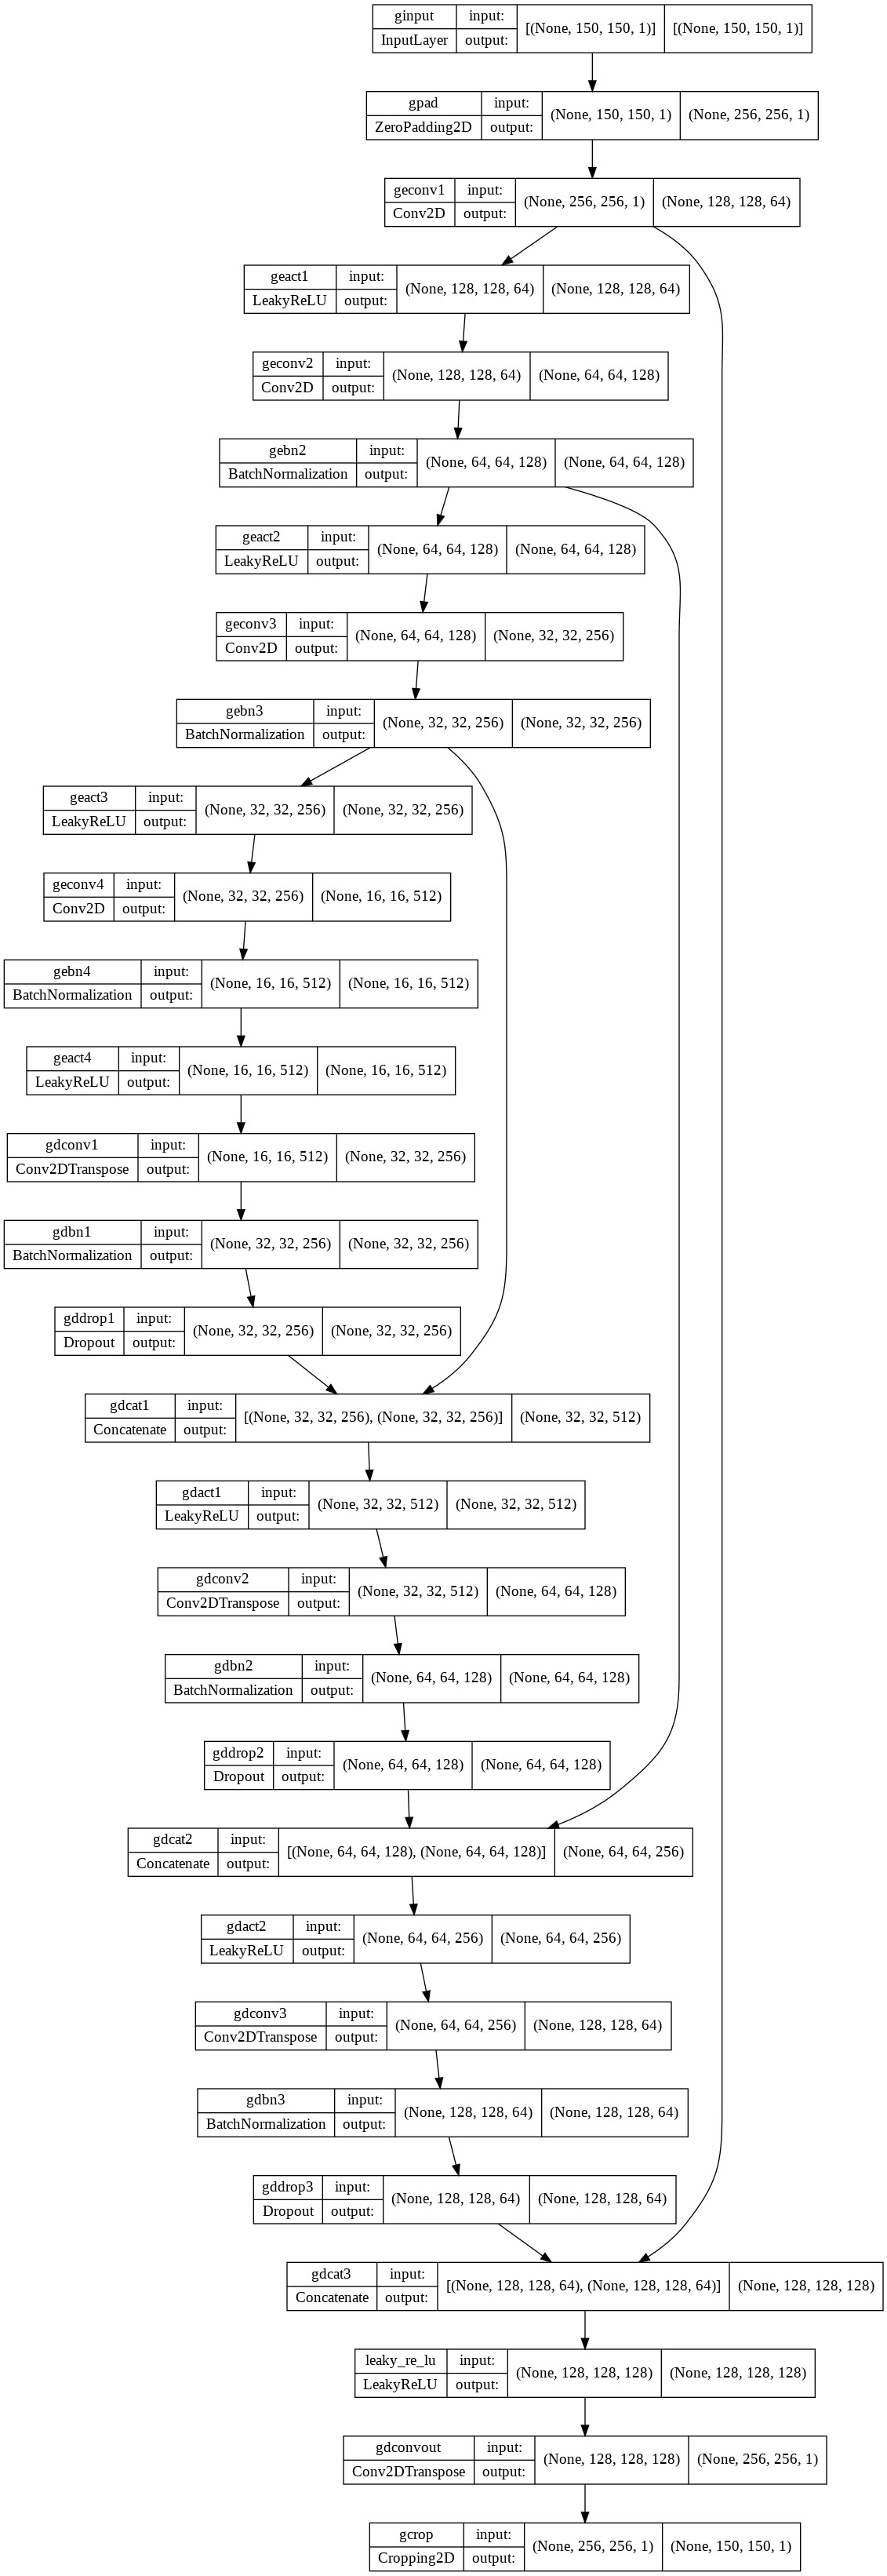

In [ ]:
generator_small = make_generator_model_small()
tf.keras.utils.plot_model(generator_small, show_shapes=True)

In [ ]:
generator_small.summary()

Model: "cond_gen"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ginput (InputLayer)            [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 gpad (ZeroPadding2D)           (None, 256, 256, 1)  0           ['ginput[0][0]']                 
                                                                                                  
 geconv1 (Conv2D)               (None, 128, 128, 64  640         ['gpad[0][0]']                   
                                )                                                                 
                                                                                           

In [ ]:
generator_large = make_generator_model()

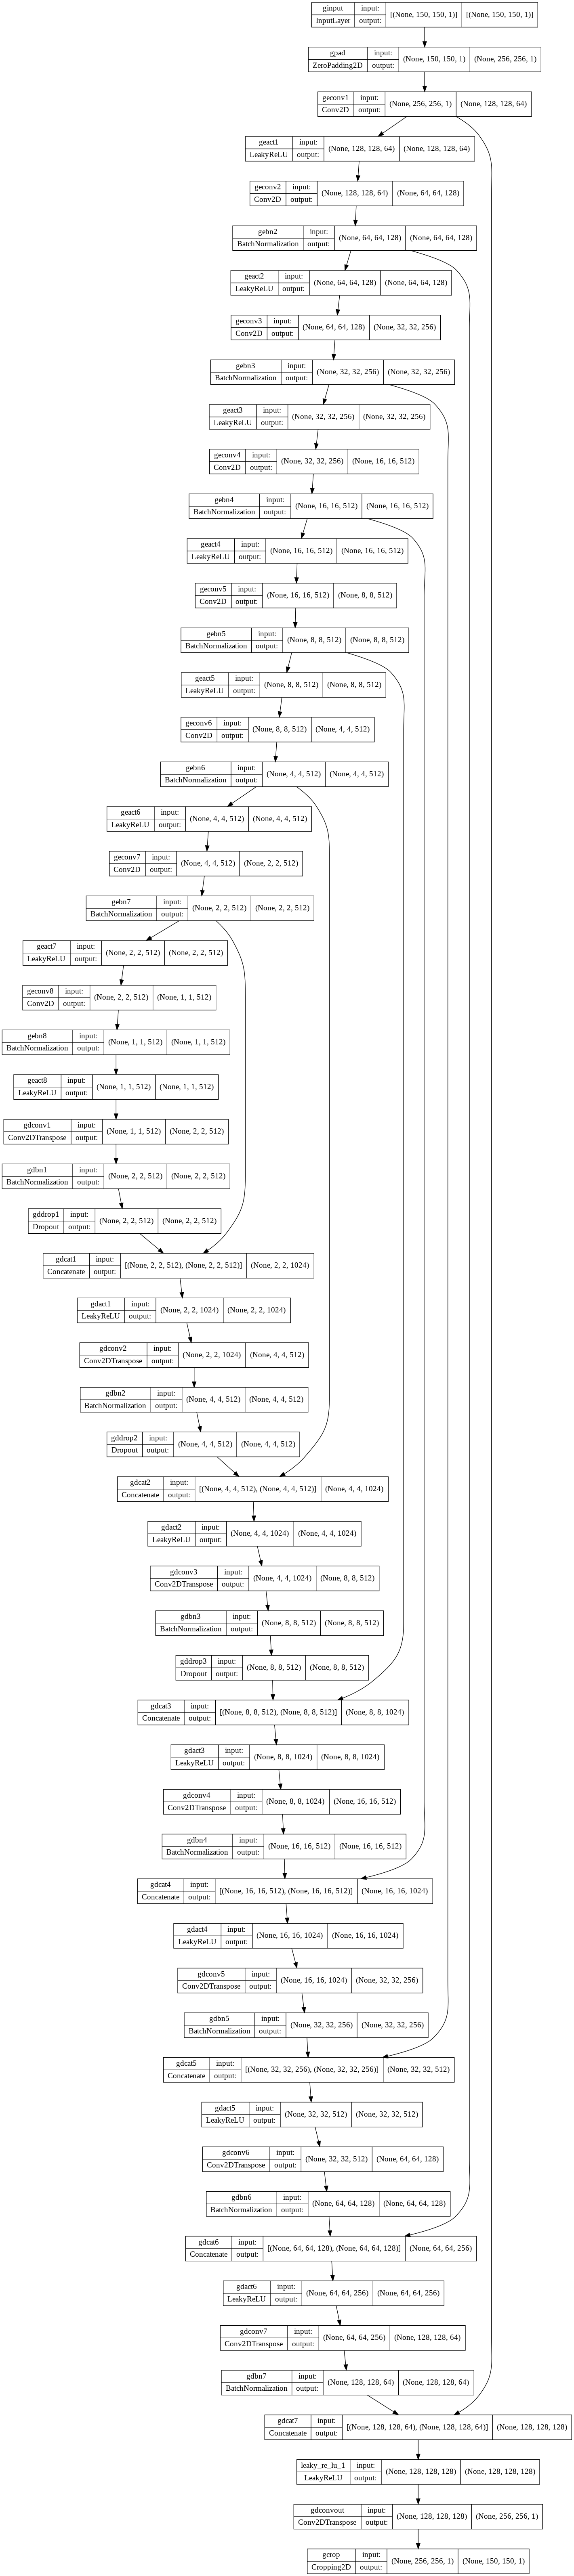

In [ ]:
tf.keras.utils.plot_model(generator_large, show_shapes=True)

In [ ]:
generator_large.summary()

Model: "cond_gen"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 ginput (InputLayer)            [(None, 150, 150, 1  0           []                               
                                )]                                                                
                                                                                                  
 gpad (ZeroPadding2D)           (None, 256, 256, 1)  0           ['ginput[0][0]']                 
                                                                                                  
 geconv1 (Conv2D)               (None, 128, 128, 64  640         ['gpad[0][0]']                   
                                )                                                                 
                                                                                           

In [ ]:
def make_discriminator_model():
    f = config.base_number_of_filters
    k = config.kernel_size
    s = config.strides
    sz = config.train_size
    c = config.channels

    inputs = tf.keras.layers.Input((sz, sz, c), name="dinput")
    # scaled_input = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)(inputs)
    d0 = tf.keras.layers.Conv2D(f, k, s, padding="same", name="dconv0")(inputs)
    d0 = tf.keras.layers.LeakyReLU(config.leak, name="dact0")(d0)
    
    d1 = tf.keras.layers.Conv2D(2*f, k, s, padding="same", name="dconv1")(d0)
    d1 = tf.keras.layers.BatchNormalization(name="dbn1")(d1)
    d1 = tf.keras.layers.LeakyReLU(config.leak, name="dact1")(d1)

    d2 = tf.keras.layers.Conv2D(4*f, k, s, padding="same", name="dconv2")(d1)
    d2 = tf.keras.layers.BatchNormalization(name="dbn2")(d2)
    d2 = tf.keras.layers.LeakyReLU(config.leak, name="dact2")(d2)

    d3 = tf.keras.layers.Conv2D(8*f, k, s, padding="same", name="dconv3")(d2)
    d3 = tf.keras.layers.BatchNormalization(name="dbn3")(d3)
    d3 = tf.keras.layers.LeakyReLU(config.leak, name="dact3")(d3)

    d4 = tf.keras.layers.Flatten(name="dflatout")(d3)

    outputs = tf.keras.layers.Dense(1, name="ddenseout")(d4)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="cond_dsc")

    return model

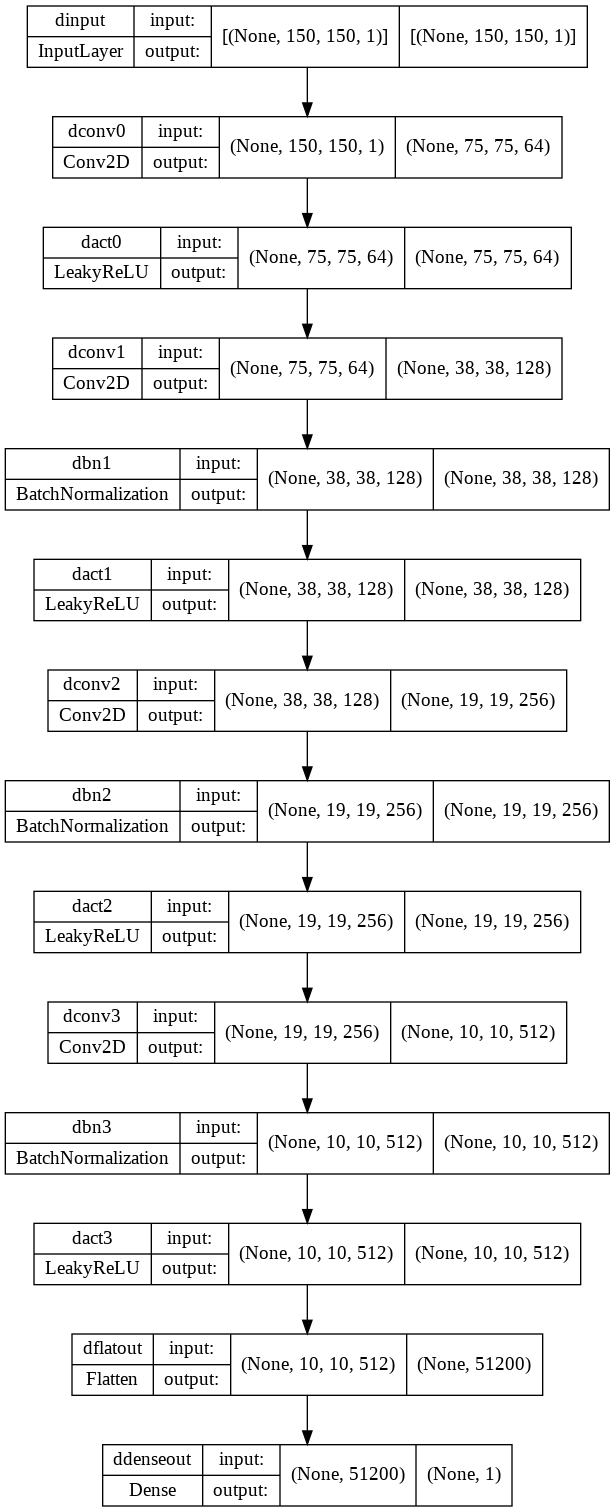

In [ ]:
discriminator = make_discriminator_model()
tf.keras.utils.plot_model(discriminator, show_shapes=True)

In [ ]:
discriminator.summary()

Model: "cond_dsc"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dinput (InputLayer)         [(None, 150, 150, 1)]     0         
                                                                 
 dconv0 (Conv2D)             (None, 75, 75, 64)        640       
                                                                 
 dact0 (LeakyReLU)           (None, 75, 75, 64)        0         
                                                                 
 dconv1 (Conv2D)             (None, 38, 38, 128)       73856     
                                                                 
 dbn1 (BatchNormalization)   (None, 38, 38, 128)       512       
                                                                 
 dact1 (LeakyReLU)           (None, 38, 38, 128)       0         
                                                                 
 dconv2 (Conv2D)             (None, 19, 19, 256)       295

In [ ]:
rmse_list = list() #create list for storing rmse values
psnr_list = list() #create list for storing psnr values

In [51]:
pred = test_X[0]
t_input = test_y[0]
t_label = test_y[0]

In [ ]:
def save(predictions, test_inputs, test_labels):
  p = predictions
  t_input = test_inputs
  t_label = test_labels

In [ ]:
import random
def generate_and_save_images(model, epoch, test_inputs, test_labels):
    if model is None:
        predictions = test_inputs
    else:
        # Make sure the training parameter is set to False because we
        # don't want to train the batchnorm layer when doing inference.
        predictions = model(test_inputs, training=False)
      
    types = [predictions, test_labels]  # Image types (alternated in rows)
    ntype = len(types)
    nrows = 4
    ncols = 8
    fig = plt.figure(figsize=(8, 5))
    
    for i in range(ntype * predictions.shape[0]):

        if (epoch == 300):

          pred = np.squeeze(predictions[0], axis=(2,))
          plt.imshow(pred, cmap='gray')
          plt.savefig('/content/gdrive/MyDrive/predictions/predicted_img.png')

          t_input =  np.squeeze(test_inputs[0], axis=(2,))
          plt.imshow(t_input, cmap='gray')
          plt.savefig('/content/gdrive/MyDrive/test_inputs/noisy_img.png')

          t_label = np.squeeze(test_labels[0], axis=(2,))
          plt.imshow(t_label, cmap='gray')
          plt.savefig('/content/gdrive/MyDrive/test_labels/ground_truth_img.png')

        else:
          plt.subplot(nrows, ncols, i+1)
          # Get relative index
          row = int(i / ncols)
          row_rel = row % ntype
          group = int(row / ntype)
          shift = ncols * (group * (ntype - 1) + row_rel)
          idx = i - shift
          # Plot
          for t in range(ntype):
            if row_rel == 0:
                j = int(i / ntype)
                rmse_ = rmse(test_labels[j], predictions[j], norm=2)
                psnr_ = psnr(test_labels[j], predictions[j], max_diff=1)

                rmse_list.append(rmse_)
                psnr_list.append(psnr_)
                

                plt.xlabel('RMSE={:.3f}\nPSNR={:.2f}'.format(rmse_, psnr_), fontsize=8)
            if row_rel == t:
                plt.imshow(types[row_rel][idx, :, :, 0], vmin=-1, vmax=1, cmap='gray')
                break
          plt.xticks([])
          plt.yticks([])
    
    plt.savefig(os.path.join('/content/gdrive/MyDrive/output_images/', 'image_at_epoch_{:04d}.png'.format(epoch)))

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(real_output), real_output)
    fake_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return real_loss, fake_loss, total_loss

In [ ]:
def generator_d_loss(fake_output):
    return tf.keras.losses.BinaryCrossentropy(from_logits=True)(tf.ones_like(fake_output), fake_output)

In [ ]:
def generator_abs_loss(labels, generated_images):
    return config.L1_lambda * tf.compat.v1.losses.absolute_difference(labels, generated_images)

In [ ]:
def getOptimizer():
    generator_optimizer = tf.keras.optimizers.Adam(config.learning_rate)
    discriminator_optimizer = tf.keras.optimizers.Adam(config.learning_rate)
    print("config.learning_rate: **************************************      "+ str(config.learning_rate))
    return generator_optimizer, discriminator_optimizer

In [ ]:
# create a line plot of loss for the CGAN and save to file
import matplotlib.pyplot as plt

def plot_history(d1_hist, d2_hist, g_hist):
# plot loss
 plt.subplot(2, 1, 1)
 plt.plot(d1_hist, label='d-real')
 plt.plot(d2_hist, label='d-fake')
 plt.plot(g_hist, label='gen')
 plt.legend()
 plt.show()


In [ ]:
d1_hist, d2_hist, g_hist, a1_hist, a2_hist = list(), list(), list(), list(), list()

In [ ]:
# This annotation causes the function to be "compiled".
# @tf.function
def train_step(inputs, labels, y_input_to_fuzzy, epoch):


    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator_small(inputs, training=True)

      real_output = discriminator(labels, training=True)
      generated_output = discriminator(generated_images, training=True)

      gen_d_loss = generator_d_loss(generated_output)
      gen_abs_loss = generator_abs_loss(labels, generated_images)
      gen_loss = gen_d_loss + gen_abs_loss


      gen_rmse = rmse(y_input_to_fuzzy, generated_images)
      gen_psnr = psnr(y_input_to_fuzzy, generated_images)
      real_loss, fake_loss, disc_loss = discriminator_loss(real_output, generated_output)
      
      d1_hist.append(real_loss)
      d2_hist.append(fake_loss)
      g_hist.append(gen_loss)

      print("Generator loss: ",gen_loss)
      print("Discriminator loss: ", disc_loss)


    generator_optimizer, discriminator_optimizer = getOptimizer()

    gradients_of_generator = gen_tape.gradient(gen_loss, generator_small.trainable_weights)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_weights)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_small.trainable_weights))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_weights))

In [ ]:
import time
def train(train_dataset, epochs):

  for epoch in range(epochs):
    start = time.time()
    #config.learning_rate = (1/(1+ 1 * epoch )) *  0.2 # learining rate decay
    num_loop = 0
    i = 0
    for x_train_input, x_train_label in train_dataset:
      
      if ( num_loop != 5 ):
        train_step(x_train_input, x_train_label, y_input_to_fuzzy[i], epoch)
        i = i + 1
      else:
        break
      num_loop += 1
    num_examples_to_generate = 16
    random_indices = np.random.choice(np.arange(test_X.shape[0]), num_examples_to_generate, replace=False)
    selected_inputs = test_X_input_to_fuzzy[random_indices]
    selected_labels = test_input_to_fuzzy[random_indices]
    generate_and_save_images(generator_small, epoch + 1,selected_inputs,selected_labels)
    print ('Time taken for epoch =========================================== {} is {} sec    '.format(epoch + 1, time.time()-start))
  generate_and_save_images(generator_small,epochs,selected_inputs,selected_labels)
  plot_history(d1_hist, d2_hist, g_hist)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y)).shuffle(config.buffer_size).batch(config.batch_size)
train(train_dataset, config.max_epoch)

Generator loss:  tf.Tensor(86.03503, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(1.1940731, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(76.03267, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(0.8442019, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(71.83635, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(0.4641055, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(62.751312, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(1.0378388, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(59.76624, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(0.4961759, shape=(), dtype=float32)
config.learning_rate: **************************************  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Time taken for epoch =========================================== 21 is 24.075305938720703 sec    
Generator loss:  tf.Tensor(3.5699608, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(1.9654408, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(6.616478, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(2.6131694, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(3.6440847, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(1.7976799, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(7.0580997, shape=(), dtype=float32)
Discriminator loss:  tf.Tensor(2.7271857, shape=(), dtype=float32)
config.learning_rate: **************************************      0.0002
Generator loss:  tf.Tensor(3.3584373, shape=(), dtype=float32)
Discriminator loss:  tf.Tens

# After training plotting some images of datasets

In [49]:
# plt.imshow(np.squeeze(pred,  axis=(2, )), cmap="gray") 

In [50]:
# plt.imshow(np.squeeze(t_input,  axis=(2, )), cmap="gray") 

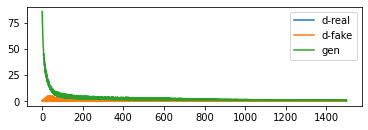

In [ ]:
plot_history(d1_hist, d2_hist, g_hist)

In [ ]:
rmse_array = np.array(rmse_list) # convert rmse list to numpy array

In [ ]:
psnr_array = np.array(psnr_list) # convert psnr list to numpy array

In [ ]:
print("mean of rmse: ", np.mean(rmse_array))
print("mean of psnr: ", np.mean(psnr_array))

mean of rmse:  0.09866137
mean of psnr:  25.35756


In [ ]:
print("standard deviation of rmse: ", np.std(rmse_array))
print("standard deviation of psnr: ", np.std(psnr_array))

standard deviation of rmse:  0.11391886
standard deviation of psnr:  9.114298
